## Supervised linear regression

Voor het product: 45 over het komende jaar

In [133]:
forecast = pd.read_csv("./Great_Outdoors_Data_SQLite1/GO_SALES_PRODUCT_FORECASTData.csv")
boolean1 = forecast["YEAR"] == 2021
forecast = forecast.loc[(boolean1), :]
forecast

,PRODUCT_NUMBER,YEAR,MONTH,EXPECTED_VOLUME
1,45,2021,1,80
2,45,2021,2,51
3,45,2021,3,214
4,45,2021,4,300
5,45,2021,5,141
...,...,...,...,...
3855,115,2021,8,207
3856,115,2021,9,433
3857,115,2021,10,1593
3858,115,2021,11,394


In [134]:
conn = sqlite3.connect("./Great_Outdoors_Data_SQLite1/go_sales.sqlite")
order = pd.read_sql_query("SELECT * FROM order_header", conn)
data = pd.read_sql_query("SELECT * FROM order_details", conn)
data = pd.merge(data, order, how="inner", on="ORDER_NUMBER", suffixes=('', ' right'))
data

,ORDER_DETAIL_CODE,ORDER_NUMBER,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE,TRIAL879,RETAILER_NAME,RETAILER_SITE_CODE,RETAILER_CONTACT_CODE,SALES_STAFF_CODE,SALES_BRANCH_CODE,ORDER_DATE,ORDER_METHOD_CODE,TRIAL885
0,100000,8462,96,16,16.1,22.54,22.54,T,Ocio y Aventura,334,319,95,29,2020-07-26,5,T
1,100001,9111,96,20,16.1,22.54,22.54,T,Naranco de Bulnes,330,315,94,29,2020-05-29,2,T
2,100002,8451,96,24,16.1,22.54,22.54,T,Ocio y Aventura,328,313,94,29,2020-04-17,2,T
3,100003,8453,96,18,16.1,22.54,22.54,T,Ocio y Aventura,328,313,94,29,2020-08-19,7,T
4,100004,8439,96,20,16.1,22.54,22.54,T,Naranco de Bulnes,326,311,95,29,2020-03-19,7,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43058,99995,8459,95,146,2.76,5.55,5.55,T,Ocio y Aventura,333,318,95,29,2020-08-20,4,T
43059,99996,8457,95,172,2.76,5.55,5.55,T,Ocio y Aventura,333,318,95,29,2020-04-04,4,T
43060,99997,9267,95,192,2.76,5.55,5.55,T,Ocio y Aventura,334,319,95,29,2020-11-20,5,T
43061,99998,8441,95,192,2.76,5.55,5.55,T,Naranco de Bulnes,326,311,95,29,2020-07-30,4,T


In [135]:
data["ORDER_DATE"] = pd.to_datetime(data["ORDER_DATE"])
datum = data["ORDER_DATE"].dt.year < 2021
data = data.loc[(datum), ["PRODUCT_NUMBER", "QUANTITY"]]

def update_result(input_df, result_df):
    # Loop door elke rij in het invoer DataFrame
    for index, row in input_df.iterrows():
        product_number = index
        # Controleer of het productnummer al in het resultaat DataFrame staat
        if product_number not in result_df.index:
            # Voeg een nieuwe rij toe aan het resultaat DataFrame met hoeveelheid 0
            result_df.loc[product_number] = 0
    return result_df

data = data.groupby("PRODUCT_NUMBER", as_index=False).sum()
data


,PRODUCT_NUMBER,QUANTITY
0,1,9444
1,10,3312
2,100,15338
3,101,1092
4,102,936
...,...,...
89,95,28244
90,96,3012
91,97,1590
92,98,9346


In [136]:
x = data
y = forecast.loc[:, ["PRODUCT_NUMBER","EXPECTED_VOLUME"]]
y = y.groupby("PRODUCT_NUMBER", as_index=False).sum()
print(x)
print(y)
x = update_result(y, x)
y = update_result(x, y)


   PRODUCT_NUMBER  QUANTITY
0               1      9444
1              10      3312
2             100     15338
3             101      1092
4             102       936
..            ...       ...
89             95     28244
90             96      3012
91             97      1590
92             98      9346
93             99      6850

[94 rows x 2 columns]
     PRODUCT_NUMBER  EXPECTED_VOLUME
0                 1            15626
1                 2            11917
2                 3             9026
3                 4            11815
4                 5             4068
..              ...              ...
110             111             1291
111             112             5969
112             113             5353
113             114              662
114             115             6872

[115 rows x 2 columns]


In [137]:
print(len(x))
print(len(y))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

NewModel = linear_model.LinearRegression()
NewModel = LinearRegression().fit(x_train, y_train)
NewModel

115
115


LinearRegression()

In [138]:
y_pred = NewModel.predict(x_test)
y_pred

array([[   65.20587971, 12262.53299218],
       [   42.21510844,  7515.10331277],
       [   63.40499578,  6738.40146404],
       [   52.8964149 ,  8080.43524922],
       [   40.12654905,  7503.14744446],
       [   64.6648948 ,  7510.02223407],
       [   50.0433706 ,  7425.91215094],
       [   56.23278915,  8683.49530859],
       [   60.30189321,  6550.84521262],
       [   41.41375136,  7927.14321657],
       [   67.99892011,  5185.88685303],
       [   64.00050748,  6627.47700315],
       [   73.44537698, 14586.26014692],
       [   67.99892011,  5185.88685303],
       [   40.85325501,  8313.2420984 ],
       [   75.33403508,  7185.3414257 ],
       [   68.16306785,  5938.1215289 ],
       [   66.13769286,  6386.04671052]])

In [139]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns={1: "Predicted_volume"})
y_pred_merge = pd.concat([y_test.reset_index(), prediction_df["Predicted_volume"]], axis=1)
y_pred_merge

,index,PRODUCT_NUMBER,EXPECTED_VOLUME,Predicted_volume
0,81,82,7364,12262.532992
1,4,5,4068,7515.103313
2,40,41,3680,6738.401464
3,69,70,2972,8080.435249
4,10,11,3033,7503.147444
5,45,46,1595,7510.022234
6,70,71,2939,7425.912151
7,66,67,6602,8683.495309
8,47,48,1833,6550.845213
9,11,12,8798,7927.143217


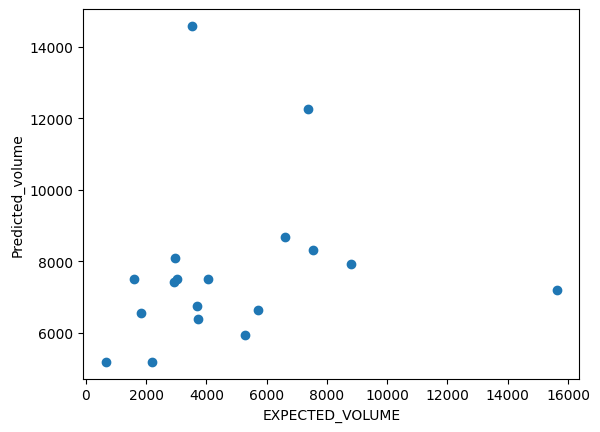

In [140]:
plt.scatter(y_pred_merge["EXPECTED_VOLUME"], y_pred_merge["Predicted_volume"])
plt.xlabel("EXPECTED_VOLUME")
plt.ylabel("Predicted_volume")
plt.show()

In [141]:
mean_absolute_error(y_pred_merge["EXPECTED_VOLUME"], y_pred_merge["Predicted_volume"])

3950.2406622547674

In [142]:
mean_squared_error(y_pred_merge["EXPECTED_VOLUME"], y_pred_merge["Predicted_volume"])

22556604.318040308